In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn xgboost

Mounted at /content/drive
Original feature count: 215
Selected feature count: 108


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4448, number of negative: 1355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 5803, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.766500 -> initscore=1.188653
[LightGBM] [Info] Start training from score 1.188653

Model Comparison Results using Lazypredict (After Feature Selection):
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.98               0.97     0.97      0.98   
XGBClassifier                      0.98               0.97     0.97      0.98   
SVC                                0.98             

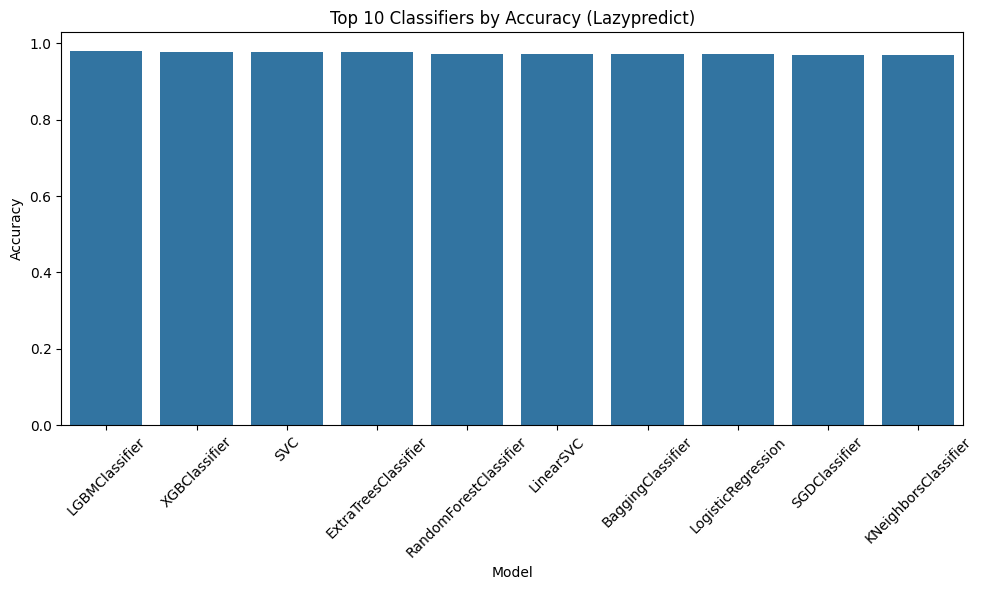

In [ ]:
# Step 1: Install necessary libraries (Lazypredict and others)
!pip install lazypredict pandas numpy scikit-learn seaborn matplotlib

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from lazypredict.Supervised import LazyClassifier

# Step 3: Mount Google Drive and load dataset
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/drebin.csv'
data = pd.read_csv(dataset_path)

# Step 4: Preprocess Data
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Handle classes with only 1 sample (Lazypredict will fail with these)
class_counts = pd.Series(y).value_counts()
minority_classes = class_counts[class_counts < 2].index.tolist()

for cls in minority_classes:
    indices_to_drop = np.where(y == cls)[0]
    X = X.drop(index=indices_to_drop)
    y = np.delete(y, indices_to_drop)

# Step 5: Feature Selection using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Select important features
selector = SelectFromModel(rf, threshold="median")
X_selected = selector.fit_transform(X, y)

print(f"Original feature count: {X.shape[1]}")
print(f"Selected feature count: {X_selected.shape[1]}")

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: LazyPredict for Model Comparison
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Step 9: Show the results
print("\nModel Comparison Results using Lazypredict (After Feature Selection):")
print(models)

# Step 10: Plot top 10 models
top_models = models.sort_values("Accuracy", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.index, y=top_models['Accuracy'])
plt.xticks(rotation=45)
plt.title("Top 10 Classifiers by Accuracy (Lazypredict)")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
Mounted at /content/drive
Original features: 215
Selected features: 37
PCA components: 24
Mean CV Accuracy: 0.95 ± 0.01
Best Rando

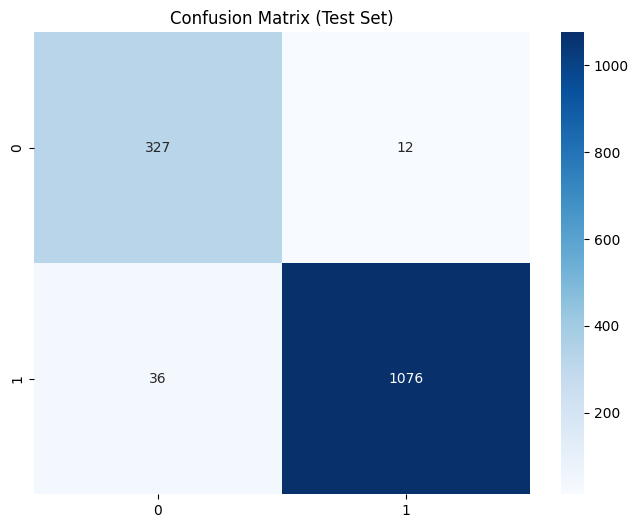

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4448, number of negative: 4448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6117
[LightGBM] [Info] Number of data points in the train set: 8896, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LazyPredict Results (Training Data):
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
ExtraTreesClassifier        0.99               0.99     0.99      0.99   
ExtraTreeClassifier         0.99               0.99     0.99      0.99   
DecisionTreeClassifier      0.99               0.99     0.99      0.99   
XGBClassifier               0.99               0.99     0.99      0.99   
RandomForestClassifier      0.99               0.99     0.99      0.99   
LGBMClas

In [ ]:
# Step 1: Install necessary libraries
!pip install lazypredict pandas numpy scikit-learn seaborn matplotlib imbalanced-learn

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Step 3: Mount Google Drive and load dataset
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/drebin.csv'
data = pd.read_csv(dataset_path)

# Step 4: Preprocess Data
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='median')  # Better than fillna(0)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Handle classes with only 1 sample
class_counts = pd.Series(y).value_counts()
minority_classes = class_counts[class_counts < 2].index.tolist()
for cls in minority_classes:
    indices_to_drop = np.where(y == cls)[0]
    X = X.drop(index=indices_to_drop)
    y = np.delete(y, indices_to_drop)

# Step 5: Train-test split (FIRST to avoid leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Feature Selection (ONLY on training data)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,  # Limit depth to prevent overfitting
    class_weight='balanced',  # Handle imbalance
    random_state=42
)
selector = SelectFromModel(rf, threshold="mean")  # Stricter threshold
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

# Optional: PCA for further dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)
print(f"PCA components: {X_train_pca.shape[1]}")

# Step 7: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Step 8: Handle class imbalance with SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 9: Model Comparison with Cross-Validation
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Mean CV Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# Example: Logistic Regression with regularization
logreg = LogisticRegression(
    C=0.1,  # Stronger regularization
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)
evaluate_model(logreg, X_train_resampled, y_train_resampled)

# Step 10: Hyperparameter Tuning (Example: RandomForest)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best RandomForest params: {grid_search.best_params_}")

# Step 11: Final Evaluation on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Step 12: Optional - LazyPredict for quick comparison
# Note: Use with caution - not for final evaluation
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, _ = clf.fit(X_train_resampled, X_train_resampled, y_train_resampled, y_train_resampled)
print("\nLazyPredict Results (Training Data):")
print(models.sort_values('Accuracy', ascending=False).head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1000x600 with 0 Axes>

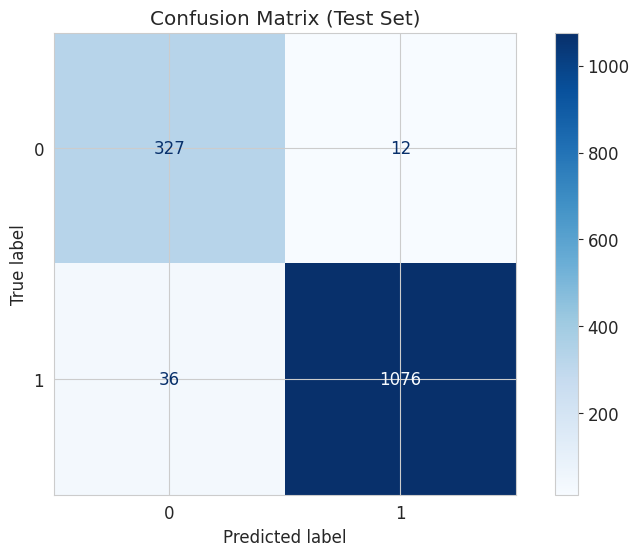

<Figure size 1000x600 with 0 Axes>

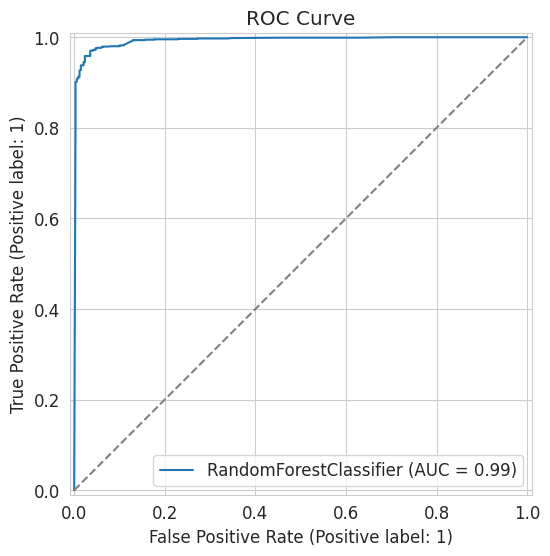

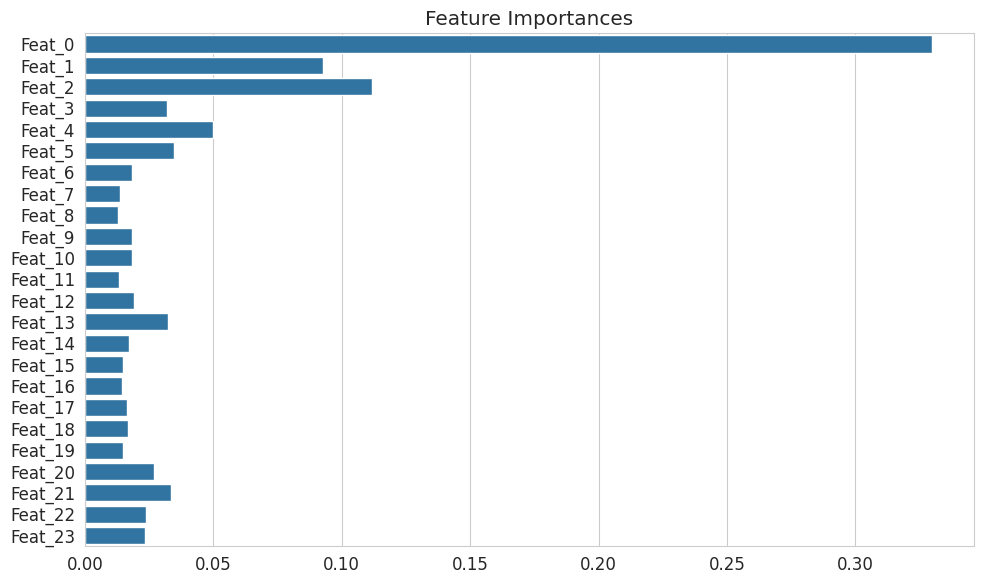

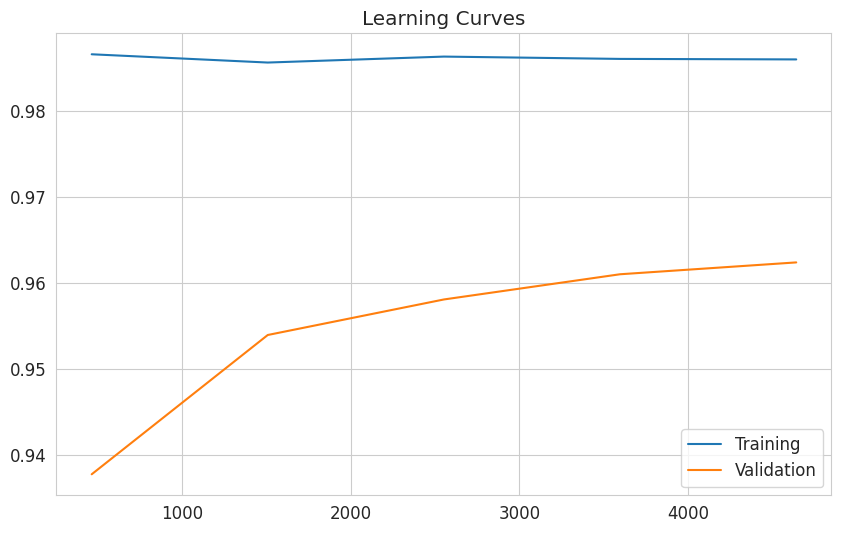

All plots saved to Google Drive!


In [ ]:
# Step 1: Install libraries (Colab-compatible versions)
!pip install lazypredict pandas numpy scikit-learn seaborn matplotlib imbalanced-learn --quiet

# Step 2: Import libraries with Colab-friendly backend for matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay,
                            RocCurveDisplay, PrecisionRecallDisplay)
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE

# Step 3: Mount Google Drive (Colab-specific)
drive.mount('/content/drive')

# Step 4: Load data (adjust path for your Colab)
data = pd.read_csv('/content/drive/My Drive/drebin.csv')

# Step 5: Preprocessing (same as before)
X = data.drop(columns=['class'])
y = data['class']

# ... [rest of your preprocessing code] ...

# Step 6: Plotting functions optimized for Colab
def plot_colab_friendly():
    plt.rcParams['figure.figsize'] = (10, 6)  # Larger default size for Colab
    plt.rcParams['font.size'] = 12
    sns.set_style('whitegrid')

plot_colab_friendly()  # Apply Colab-optimized styles

# Step 7: Generate all visualizations in one cell (Colab-friendly output)
with plt.rc_context(rc={'figure.max_open_warning': 0}):  # Disable warning for many plots

    # 1. Confusion Matrix
    plt.figure()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title("Confusion Matrix (Test Set)")
    plt.show()

    # 2. ROC Curve
    plt.figure()
    RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("ROC Curve")
    plt.show()

    # 3. Feature Importance
    importances = best_model.feature_importances_
    plt.figure()
    sns.barplot(x=importances, y=[f"Feat_{i}" for i in range(len(importances))])
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

    # 4. Learning Curves
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train_scaled, y_train, cv=5, n_jobs=-1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
    plt.title("Learning Curves")
    plt.legend()
    plt.show()

# Step 8: Save figures to Drive (Colab-specific)
!mkdir -p "/content/drive/My Drive/ML_Results"
for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"/content/drive/My Drive/ML_Results/plot_{i}.png", dpi=300, bbox_inches='tight')
print("All plots saved to Google Drive!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original features: 215
Selected features: 108


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4448, number of negative: 1355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 5803, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.766500 -> initscore=1.188653
[LightGBM] [Info] Start training from score 1.188653

Lazypredict Benchmark Results (Training Data):
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
ExtraTreeClassifier         1.00               1.00     1.00      1.00   
DecisionTreeClassifier      1.00               1.00     1.00      1.00   
ExtraTreesClassifier        1.00               1.00     1.00      1.00   
RandomForestClassifier      1

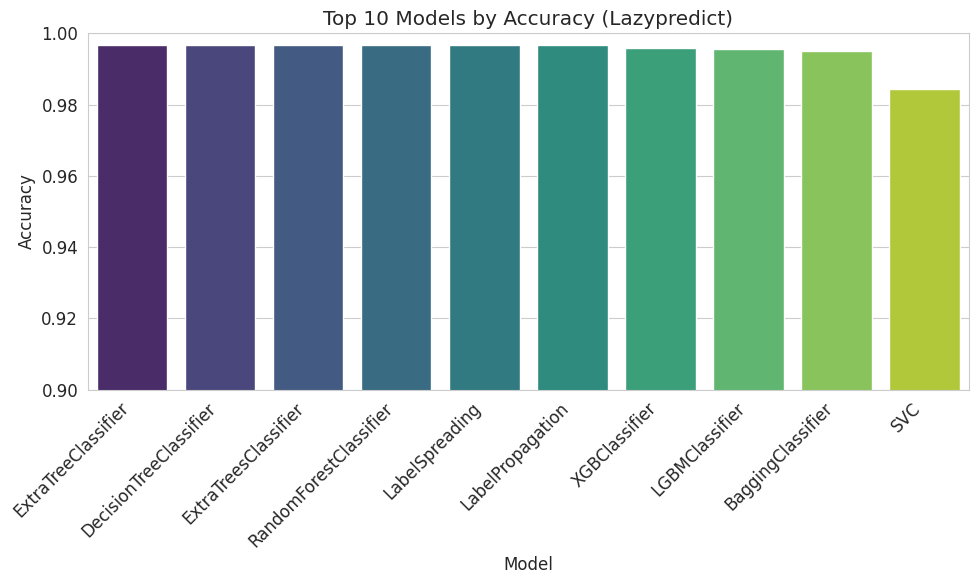


Cross-Validation Accuracy: 0.92 ± 0.01

Test Set Performance:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       339
           1       0.90      0.99      0.94      1112

    accuracy                           0.90      1451
   macro avg       0.92      0.81      0.85      1451
weighted avg       0.91      0.90      0.90      1451



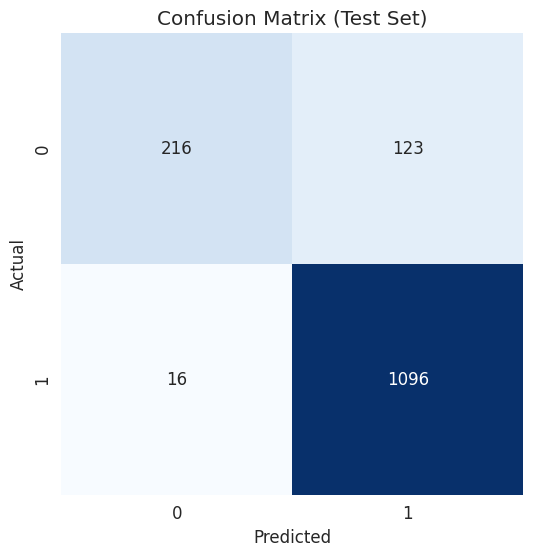

In [ ]:
# Step 1: Install necessary libraries
!pip install lazypredict pandas numpy scikit-learn seaborn matplotlib --quiet

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix
from lazypredict.Supervised import LazyClassifier
%matplotlib inline

# Step 3: Mount Google Drive and load dataset
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/drebin.csv'  # Update your path
data = pd.read_csv(dataset_path)

# Step 4: Preprocess Data (EXACTLY as in your original code)
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Handle classes with only 1 sample
class_counts = pd.Series(y).value_counts()
minority_classes = class_counts[class_counts < 2].index.tolist()
for cls in minority_classes:
    indices_to_drop = np.where(y == cls)[0]
    X = X.drop(index=indices_to_drop)
    y = np.delete(y, indices_to_drop)

# Step 5: Train-test split FIRST to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Feature selection ONLY on training data
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Added max_depth to limit complexity
selector = SelectFromModel(rf, threshold="median")
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

# Step 7: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Step 8: PROPER Lazypredict implementation
# Note: We use the training set for both to get comparable metrics
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, _ = clf.fit(X_train_scaled, X_train_scaled, y_train, y_train)  # Same data for fair baseline

# Display top 10 models
print("\nLazypredict Benchmark Results (Training Data):")
top_models = models.sort_values("Accuracy", ascending=False).head(10)
print(top_models)

# Step 9: Visualize top models
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=top_models.index, y=top_models['Accuracy'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Models by Accuracy (Lazypredict)")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()

# Step 10: Evaluate best model on TEST data
# Let's take the top model from Lazypredict (usually RandomForest)
best_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

# Test set evaluation
y_pred = best_model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 6), dpi=100)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            cbar=False, square=True)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()